# Moving Average

**参考资源**

> - [How to Calculate Exponential Moving Averages](https://sciencing.com/calculate-exponential-moving-averages-8221813.html)
> - [指数加权移动平均(Exponential Weighted Moving Average)](https://blog.csdn.net/mzpmzk/article/details/80085929)
> - [Simple, Exponential, and Weighted Moving Averages](https://www.thebalance.com/simple-exponential-and-weighted-moving-averages-1031196)
> - [Moving Average, Weighted Moving Average, and Exponential Moving Average](https://www.investopedia.com/ask/answers/071414/whats-difference-between-moving-average-and-weighted-moving-average.asp)
> - [How Is the Exponential Moving Average (EMA) Formula Calculated?](https://www.investopedia.com/ask/answers/122314/what-exponential-moving-average-ema-formula-and-how-ema-calculated.asp)
> - [Exploring the Exponentially Weighted Moving Average](https://www.investopedia.com/articles/07/ewma.asp)
> - [为什么在优化算法中使用指数加权平均](https://www.jianshu.com/p/41218cb5e099)

移动平均或称为移动平均线，是基于时间序列的一种统计方式，它主要用于在图表中显示趋势线。它的作用是消除“噪音”使数据更加“平滑”，它反映的是一种趋势。其中周期的天数是非常重要的参数，其值越大则趋势线越“平滑”（所谓平滑，也就是消除“噪音”的效果越好），对当前趋势反映越迟钝；其值越小则趋势线越“陡峭”，对当前趋势反映越敏感，但对于“噪音”消除的效果不好。

> 这里对“噪音”解释一下，它其实就是一系列数据中的异常值，它的出现会影响趋势判断，比如在某地的天气中，夏季基本气温都在34°左右，突然有那么一两天的气温高至40°，那么这些40°的气温对夏季来说就是“噪音”。

移动平均线有三种形式：

- Simple Moving Average - SMA
- Weighted Moving Average - WMA
- Exponential Moving Average - EMA

# SMA

Simple Moving Average 简单移动平均线

$
SMA = \frac{1}{N}\displaystyle\sum_{i=1}^{N}P_i
$

> - $N$: 周期内的数量（比如：5天一个周期中的5,10天一个周期的10）
> - $P_i$: 周期中第 $i$ 个数据的值（比如：5天一个周期中的第1天的数据、第2天的数据等）

# WMA

Weighted Moving Average 权重移动平均

WMA 的思想是，离当前时间越近的值对当前移动平均计算影响力越大，这是一个很直观的现象，昨天的31度比10天前的30度对当前的趋势判断影响更大。根据这个思想，我们需要在计算移动平均时为不同的数据赋予不同的权重。

SMA 实际上是 WMA 一种形式，SMA 默认每个值的权重相等，为 $\frac{1}{N}$

$
\begin{align*}
    WMA &= \frac{\displaystyle\sum_{i=1}^{N} P_i i}{\frac{N(N+1)}{2}} \\
       &= \frac{2}{N(N+1)}\displaystyle\sum_{i=1}^{N} P_i i
\end{align*}
$

> - $N$: 周期内的数量（比如：5天一个周期中的5,10天一个周期的10）
> - $P_i$: 周期中第 $i$ 个数据的值（比如：5天一个周期中的第1天的数据、第2天的数据等）


# EMA

Exponential Moving Average 指数移动平均

EMA 的思想与 WMA 是一致的，只是它的权重计算更加的复杂，权重的计算方式的思路是用昨天的 EMA 来计算今天的 EMA。

$
EMA = (P_{today} - EMA_{yesterday})K + EMA_{yesterday}
$

> - $P_{today}$: 今天的数值
> - $EMA_{yesterday}$: 昨天的 EMA
> - $K$: 权重或称为平滑常量（smoothing constant），其计算公式为 $K=\frac{2}{N+1}$ N表示周期内的数量（天数）

# EWMA

$
V_t=\beta V_{t-1} + (1 - \beta)\theta_t
$

> - $\beta$： 大于等于0.9 （0.9表示周期为10天$\frac{1}{1-\beta}=\frac{1}{1-0.9}=10$；0.98表示周期50天）

In [3]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [20]:
################################################################################
# 准备数据
################################################################################
np.random.seed(7090)
# 正常数据
temperature = np.random.randint(30, 34, size=27)
# 噪音数据
noise = np.random.randint(37, 40, size=4)
temperature = np.concatenate((temperature, noise))
# 打乱数据
np.random.shuffle(temperature)
temperature

array([33, 30, 38, 32, 32, 32, 37, 31, 31, 30, 30, 33, 30, 30, 30, 32, 30,
       32, 33, 31, 33, 32, 33, 32, 31, 39, 32, 30, 33, 30, 37])

In [21]:
################################################################################
# 算法实现
################################################################################


def SMA(x, period=5):
    """Simple Moving Average
    SMA算法，输入数据长度 L，输出数据长度 L - period + 1。
    如果 L < period，则直接返回输入数据的平均值。

    Parameters:
    -----------
    x {ndarray}: 输入数据
    period {int}: 周期

    Returns:
    --------
    ndarray - 移动平局线
    """
    if x.size < period:
        return np.array([x.mean()])
    y = []
    for i in np.arange(period, x.size+1):
        tmp = x[i-period:i].mean()
        y.append(tmp)
    return np.array(y)


def WMA(x, period=5):
    """Weighted Moving Average
    WMA算法，输入数据长度 L，输出数据长度 L - period + 1。
    如果 L < period，则直接返回输入数据的平均值。

    Parameters:
    -----------
    x {ndarray}: 输入数据
    period {int}: 周期

    Returns:
    --------
    ndarray - 移动平局线
    """
    if x.size < period:
        return np.array([x.mean()])
    n = period * (period + 1) / 2
    # 设置权重
    w = np.arange(1, period+1) / n
    y = []
    for i in np.arange(period, x.size+1):
        tmp = x[i-period:i]
        tmp = np.average(tmp, weights=w)
        y.append(tmp)
    return np.array(y)

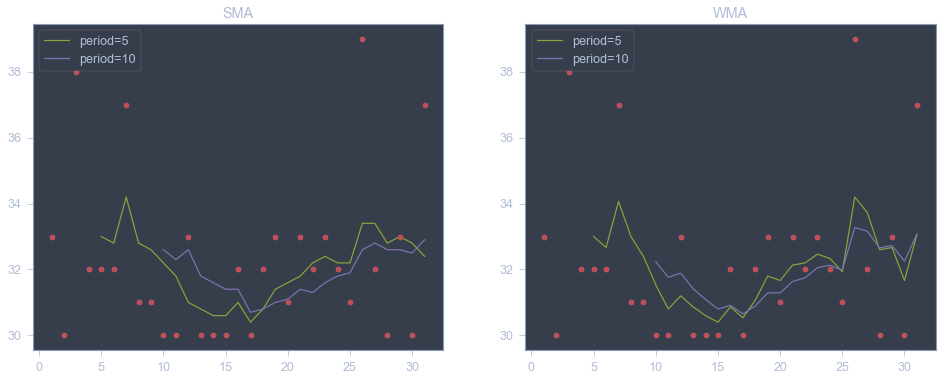

In [22]:
################################################################################
# 图表展示
################################################################################
def plot_ma(data, ma, period=5):
    # 画原始数据
    x_o = np.arange(data.size) + 1
    plt.plot(x_o, data, 'o')
    # 画移动平均线
    y = ma(data, period=period)
    x = np.arange(y.size) + period
    plt.plot(x, y, label=f'period={period}')


fig = plt.figure(figsize=(25, 6))
# plot SMA
plt.subplot(131)
plot_ma(temperature, SMA, period=5)
plot_ma(temperature, SMA, period=10)
plt.title('SMA')
plt.legend()
# plot WMA
plt.subplot(132)
plot_ma(temperature, WMA, period=5)
plot_ma(temperature, WMA, period=10)
plt.title('WMA')
plt.legend()

plt.show()

<span class="girk">从上图可以看出周期越长，移动平均线就约平滑，但“延迟”也越高。</span>